# Chapter 6: Python Object Oriented Programming

ทุกอย่างในไพธอนเป็น object (วัตถุ). ดังนั้น OOP จึงเป็นคุณลักษณะหลักของไพธอน
สองสิ่งหลักในOOP คือ object และ class. Class เปรียบเสมือนแบบแปลนพิมพ์เขียวสำหรับการสร้างวัตถุ
เมื่อวัตถุถูกสร้างขึ้นโดยclass, มันจะสืบคุณสมบัติ class attributes และ methods 

In [1]:
# oop/simplest.class.py
class Simplest():  # when empty, the braces are optional
    pass
print(type(Simplest))  # what type is this object?
simp = Simplest()  # we create an instance of Simplest: simp
print(type(simp))  # what type is simp?
# is simp an instance of Simplest?
print(type(simp) is Simplest)  # There's a better way to do this


<class 'type'>
<class '__main__.Simplest'>
True


อธิบายนักเรียนเป็นภาษาไทย
Class Simplest ที่เราสร้างขึ้นทำงานแค่ผ่านคำสั่งอย่างเดียว  นั่นคือมันไม่มีattributesหรือmethodเฉพาะสำหรับตัวมัน. วงเล็บหลังตัวมันแสดงถึงการสืบทอดต่อจากคลาสบรรพบุรุษซึ่งในกรณีนี้ไม่มี ถ้าภายในวงเล็บว่างสามารถละทิ้งได้  เราพิมพ์ typeของมันออกมาดู  ซึ่งก็พบคำว่า __main__ ซึ่งเป็นชื่อของสโคปซึ่งอยู่สูงสุดของชั้นของการexecute โค้ด
สิ่งที่เราเห็น <class '__main__.Simplest'> คือวัตถุไม่ใช่คลาส  
ให้นักเรียนสนใจศัพท์คำว่า วัตถุ กับ instanceของคลาส  คำว่า instance นั้นคงเปรียบได้กับชีวิต  เพราะinstance ต้องการหน่วยความจำของคำพิวเตอร์และเวลาของการทำงานของซีพียู


# Class and object namespaces

ภายในคลาสเป็นname space(ช่องชื่อ)เป็นของตัวเอง  เราสามารถสร้างวัตถุของคลาสขึ้นมา แต่ละ instance สืบทอดคุณลักษณะของคลาส (class attriubutes) และวิธีการ (methods)ทั้งหลายและมีช่องชื่อ (namespace)เป็นของตัวเอง  เราใช้ Operator จุด (.) เพื่อเดินเข้าสู่namespace ของคลาส



In [2]:
# oop/class.namespaces.py
class Person:
    species = 'Human'
    
print(Person.species)  # Human
Person.alive = True  # Added dynamically!
Person.species = 'Android'
print('class attr:',Person.species) 
print(Person.alive)  # True
man = Person()
print('obj attr:',man.species)
print(man.alive)  # True (inherited)
Person.alive = False
print('man.alive', man.alive)  # False (inherited)
man.name = 'Darth'
man.surname = 'Vader'
print(man.name, man.surname)  # Darth Vader
man2 = Person()
#print(Person.name)
print("จงใจผิด เพื่อแสดงว่า manมีnameจากการเพิ่มในobjectไม่ทำให้เป็น attr ของคลาส")
print(man2.name, man2.surname)


Human
class attr: Android
True
obj attr: Android
True
man.alive False
Darth Vader
จงใจผิด เพื่อแสดงว่า manมีnameจากการเพิ่มในobjectไม่ทำให้เป็น attr ของคลาส


AttributeError: 'Person' object has no attribute 'name'

ตัวอย่างด้านบนแสดงการนิยามclass attribute ชื่อว่า Species. ชื่อใดๆที่ถูกเขียนในตัวของคลาสจะกลายเป็นattributeของคลาสนั้น. ในโค้ด เราได้นิยาม Person.alive ซึ่งเป็นclass attributeอันหนึ่ง เรานิยามattributeตัวที่สองคือ alive แบบ dynamic เราสามารถเห็นได้ว่ามันไม่มีข้อห้ามในการเข้าถึงattributeจากคลาสโดยตรง  เราสามารถเห็นได้ว่า man ซึ่งเป็น instance ของคลาส Person สืบทอดattribute speicies, และ alive.

มีการเพิ่มattribute 2 ตัวให้เฉพาะinstanceที่ชื่อ man คือ name, surname. ถ้าเราสร้างman2 จะไม่มีattribute2ชื่อนี้ ถ้าเราหาจากคลาสPersonก็จะไม่มีattributes2ชื่อนี้


Class attributes are shared among all instances, while instance attributes are not; therefore, you should use class attributes to provide the states and behaviors to be shared by all instances and use instance attributes for data that will be specific to each individual object.

## Attribute shadowing

เมื่อเราหาattributeของobject ถ้าไม่พบ  ไพธอนจะหาเพิ่มเติมไปที่attributesของคลาสที่สร้างวัตถุนี้ขึ้นมา และจะหาจนกว่าจะเจอหรือจนว่าโซ่แห่งการสืบทอดจะสิ้นสุด  สิ่งนี้ก่อให้เกิดปรากฏการณ์"เงา"ของattribute


In [3]:
class Point:
    x = 10
    y = 7
p = Point()
print('p.x',p.x)  # 10 (from class attribute)
print('p.y',p.y)  # 7 (from class attribute)
p.x = 12  # p gets its own `x` attribute
print('p.x',p.x)  # 12 (now found on the instance)
print('Point.x',Point.x)  # 10 (class attribute still the same)
del p.x  # we delete instance attribute
print('p.x aftr del',p.x)  # 10 (now search has to go again to find class attr)
p.z = 3  # let's make it a 3D point
print('p.z',p.z)  # 3
print("จงใจผิด เพื่อแสดงว่า manมีnameจากการเพิ่มในobjectไม่ทำให้เป็น attr ของคลาส")
print(Point.z) 
# AttributeError: type object 'Point' has no attribute 'z'

p.x 10
p.y 7
p.x 12
Point.x 10
p.x aftr del 10
p.z 3
จงใจผิด เพื่อแสดงว่า manมีnameจากการเพิ่มในobjectไม่ทำให้เป็น attr ของคลาส


AttributeError: type object 'Point' has no attribute 'z'

เรานิยามคลาสชื่อ Pointที่มีattributes2ตัวคือx,y เมื่อเราพิมพ์ p.x ไพธอนหาค่าxในวัตถุไม่เจอก็ย้อนกลับไปหาในคลาส 

จากนั้นเราให้ค่าattribute xโดยการให้ค่า p.x=12. สิ่งที่เกิดขึ้นคล้ายกับ namespace ของ global กับในฟังก์ชั่นในบทที่4  การเปลี่ยนค่าในnamespaceของฟังก์ชั่นไม่เปลี่ยนค่าในglobal  สิ่งนี้คือสิ่งเดียวกัน   การเปลี่ยนค่าattributeในช่องชื่อของวัตถุไม่เปลี่ยนแปลงค่าattributeในช่องชื่อของคลาส 

หลังจากการให้ค่าp.x=12, เมื่อเราสั่งพิมพ์  โซ่ของการสืบทอดแรกคือattribute xของ object p.เมื่อเจอ ไพธอนก็หยุดหาและนำค่ามาตอบ เราจึงได้12.

และเมื่อเราสั่งลบxออกจาก namespace ของp  นั่นหมายความว่า ไพธอนเวลาหาค่าจะหาค่าในช่องชื่อของpไม่เจอ แล้วก็สืบย้อนไปหาในช่องชื่อของคลาสแล้วเจอ จึงพิมพ์10อีกครั้ง

สามบรรทัดสุดท้ายแสดงถึงว่าการassignค่าattributeให้instanceไม่ได้ทำให้มันนิยามในคลาส.



# The self argument

ถ้าเราต้องการเรียกattributeของคลาสเองภายในคลาส เราใช้ข้อตกลงที่เรียกว่า self. Selfจะเป็น attributeตัวแรกของฟังก์ชั่นในคลาส  เราเรียกฟังก์ชั่นของคลาส(ฟังก์ชั่นในคลาส)ว่า Methods. Selfจะเป็น attributeตัวแรกของMethods.


In [4]:
# oop/class.self.py
class Square:
    side = 8
    def area(self):  # self is a reference to an instance
        return self.side ** 2
sq = Square()
print(sq.area())  # 64 (side is found on the class)
print(Square.area(sq))  # 64 (equivalent to sq.area())
sq.side = 10
print(sq.area())  # 100 (side is found on the instance)


64
64
100


selfจะเป็น argumentแรกของmethodเสมอ  เราใช้methodของobject ก็เหมือนการที่เราเรียกmethodของคลาสมาใส่ตัวเองลงไป 

# Initializing an instance
# การเกิดเริ่มต้นของinstance

สมมุติเราต้องการคำนวนราคาหลังภาษีและหลังลดราคา  ถ้าเราสร้างคลาสขี้นมาคำนวนสิ่งี้นี้  เราต้องมีการให้ค่าเริ่มต้น p1.net_price = 100 การให้ค่าเริ่มต้นในลักษณะนี้มันไม่สวย เข้าใจไม่ง่าย บางทีมันอาจจะสวยกว่าถ้าเราเขียนว่า p1 = Prince(100) ในภาษาอื่นจะมีสิ่งที่เรียกว่า constructor method แต่ในไพธอน เราเรียกว่า initializer แต่การทำงานคือสิ่งเดียวกัน  

Initializer method ในไพธอนจะใช้ชื่อพิเศษที่ชื่อว่า __init__ . วัตถุของไพธอนมีmethod ชื่อ __new__ ซึ่งเป็น constructor ตัวจริง แต่ในทางปฎิบัติ เราให้ค่าเริ่มต้นของobjectของไพธอนจากคลาสattributeด้วย __init__ method.

In [5]:
# oop/class.price.py
class Price:
    
    def final_price(self, vat, discount=0):
        """Returns price after applying vat and fixed discount."""
        return (self.net_price * (100 + vat) / 100) - discount
p1 = Price()
p1.net_price = 100
print(Price.final_price(p1, 20, 10))  # 110 (100 * 1.2 - 10)
print(p1.final_price(20, 10))  # equivalent


110.0
110.0


In [6]:
# oop/class.init.py
class Rectangle:
    def __init__(self, side_a, side_b):
        self.side_a = side_a
        self.side_b = side_b
    def area(self):
        return self.side_a * self.side_b
r1 = Rectangle(10, 4)
print(r1.side_a, r1.side_b)  # 10 4
print(r1.area())  # 40
r2 = Rectangle(7, 3)
print(r2.area())  # 21


10 4
40
21


## OOP is about code reuse
# หลักการOOPมีเพื่อการนำโค้ดมาใช้ซ้ำ

ตอนนี้มันก็ชัดเจนว่าหลักการOOP มีเพื่อนำโค้ดมาใช้ซ้ำ  เราสร้างคลาส เราสร้างวัตถุ เราสร้างinstance. Instances เหล่านั้นใช้ methods ซึ่งถูกนิยามในคลาสเท่านั้น  มันทำงานต่างกันออกไปขึ้นกับการถูกinitializeอย่างไร


# Inheritance and composition
OOP ยังมีความสามารถอีกสองอย่างคือการสืบทอดบรรพบุรุษของคลาส (inheritance) และการประกอบกัน (composition).

การสืบทอดจากบรรพบุรุษหมายถึงว่าวัตถุสองคลาสมีความสำพันธ์กันแบบis-aหรือ"เป็น"  วัตถุชนิดหนึ่งเป็นวัตถุอีกชนิดหนึ่ง (แต่กลับกันอาจจะไม่จริง)  ส่วน 

In [7]:
# oop/class_inheritance.py
class Engine:
    def start(self):
        pass
    def stop(self):
        pass
class ElectricEngine(Engine):  # Is-A Engine
    pass
class V8Engine(Engine):  # Is-A Engine
    pass


In [8]:
class Car:
    engine_cls = Engine
    def __init__(self):
        self.engine = self.engine_cls()  # Has-A Engine
    def start(self):
        print(
            'Starting engine {0} for car {1}... Wroom, wroom!'
            .format(
                self.engine.__class__.__name__,
                self.__class__.__name__)
        )
        self.engine.start()
    def stop(self):
        self.engine.stop()
class RaceCar(Car):  # Is-A Car
    engine_cls = V8Engine
class CityCar(Car):  # Is-A Car
    engine_cls = ElectricEngine
class F1Car(RaceCar):  # Is-A RaceCar and also Is-A Car
    pass  # engine_cls same as parent
car = Car()
racecar = RaceCar()
citycar = CityCar()
f1car = F1Car()
cars = [car, racecar, citycar, f1car]
for car in cars:
    car.start()


Starting engine Engine for car Car... Wroom, wroom!
Starting engine V8Engine for car RaceCar... Wroom, wroom!
Starting engine ElectricEngine for car CityCar... Wroom, wroom!
Starting engine V8Engine for car F1Car... Wroom, wroom!


Electrical engine เป็น Engine. RaceCar, CitiyCar เป็น Car. Car มี engine.

เมื่อเราเขียนว่า class A(B)  ในนิยามของคลาสA. เราได้นิยามคลาสAให้เป็นลูกของคลาสB และ B เป็นพ่อแม่ของคลาสA. เราสามารถเรียกว่าคลาสparentหรือเบสคลาส(Base Class) คือคสองคำที่มีความหมายเดียวกัน  เราเรียกว่า คลาสA extend จากคลาสB หรือ คลาสA สืบทอด(inherite)จาก คลาสB

รถล้วมีเครื่องยนต์ แต่ถ้าเป็นรถแข่ง ก็ใช้เครื่องV8. ถ้าเป็นรถในเมืองก็ใช้เครื่องยนต์ไฟฟ้า

เราควรนิยาม engine_cls ในฐานะ attributeของคลาสเพราะว่ามันมีแนวโน้มว่ารถทุกชนิดต้องมีengine

ความสำพันธ์แบบวัตถุหนึ่งมีอีกวัตถุหนึ่งเราเรียกว่าความสำพันธ์แบบ composition. ความสำพันธ์แบบวัตถุหนึ่งเป็นอีกวัตถุหนึ่งเราเรียกว่าเป็นความสำพันธ์แบบ inheritance.


In [9]:
car = Car()
racecar = RaceCar()
f1car = F1Car()
cars = [(car, 'car'), (racecar, 'racecar'), (f1car, 'f1car')]
car_classes = [Car, RaceCar, F1Car]
for car, car_name in cars:
    for class_ in car_classes:
        belongs = isinstance(car, class_)
        msg = 'is a' if belongs else 'is not a'
        print(car_name, msg, class_.__name__)
""" Prints:
car is a Car
car is not a RaceCar
car is not a F1Car
racecar is a Car
racecar is a RaceCar
racecar is not a F1Car
f1car is a Car
f1car is a RaceCar
f1car is a F1Car
"""


car is a Car
car is not a RaceCar
car is not a F1Car
racecar is a Car
racecar is a RaceCar
racecar is not a F1Car
f1car is a Car
f1car is a RaceCar
f1car is a F1Car


' Prints:\ncar is a Car\ncar is not a RaceCar\ncar is not a F1Car\nracecar is a Car\nracecar is a RaceCar\nracecar is not a F1Car\nf1car is a Car\nf1car is a RaceCar\nf1car is a F1Car\n'

In [10]:
# oop/class.issubclass.isinstance.py
for class1 in car_classes:
    for class2 in car_classes:
        is_subclass = issubclass(class1, class2)
        msg = '{0} a subclass of'.format(
            'is' if is_subclass else 'is not')
        print(class1.__name__, msg, class2.__name__)
""" Prints:
Car is a subclass of Car
Car is not a subclass of RaceCar
Car is not a subclass of F1Car
RaceCar is a subclass of Car
RaceCar is a subclass of RaceCar
RaceCar is not a subclass of F1Car
F1Car is a subclass of Car
F1Car is a subclass of RaceCar
F1Car is a subclass of F1Car
"""


Car is a subclass of Car
Car is not a subclass of RaceCar
Car is not a subclass of F1Car
RaceCar is a subclass of Car
RaceCar is a subclass of RaceCar
RaceCar is not a subclass of F1Car
F1Car is a subclass of Car
F1Car is a subclass of RaceCar
F1Car is a subclass of F1Car


' Prints:\nCar is a subclass of Car\nCar is not a subclass of RaceCar\nCar is not a subclass of F1Car\nRaceCar is a subclass of Car\nRaceCar is a subclass of RaceCar\nRaceCar is not a subclass of F1Car\nF1Car is a subclass of Car\nF1Car is a subclass of RaceCar\nF1Car is a subclass of F1Car\n'

คลาสถือว่าเป็นsubclassของตัวเอง

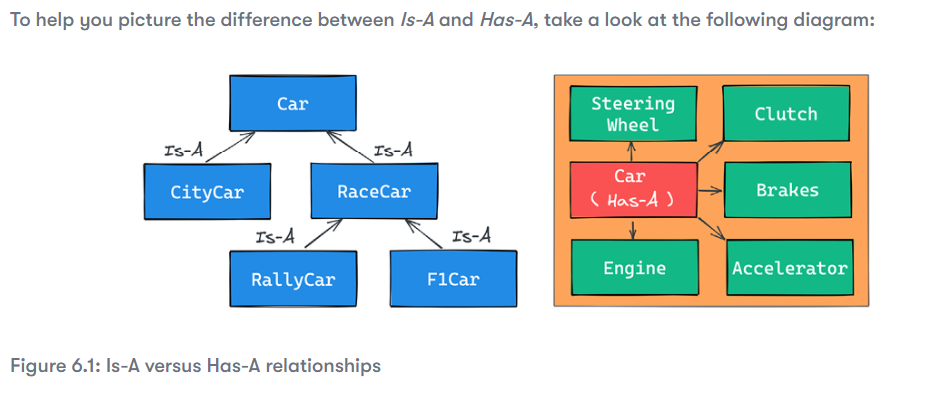

# Accessing a base class
We've already seen class declarations, such as class ClassA: pass and class ClassB(BaseClassName): pass. When we don't specify a base class explicitly, Python will set the special object class as the base class for the one we're defining. Ultimately, all classes derive from object. Please remember that, if you don't specify a base class, brackets are optional and in practice are never used.

ถ้าเราไม่นิยามbase classอย่างชัดเจน  Python จะให้คลาสน้้นเป็นลูกของ object class. ถ้าคุณไม่มีเบสคลาส จะใส่หรือไม่ใส่วงเล็บหลังชื่อคลาสก็ได้ แต่โดยทั่วไปไม่ใส่



In [11]:
# oop/super.duplication.py
class Book:
    def __init__(self, title, publisher, pages):
        self.title = title
        self.publisher = publisher
        self.pages = pages
class Ebook(Book):
    def __init__(self, title, publisher, pages, format_):
        self.title = title
        self.publisher = publisher
        self.pages = pages
        self.format_ = format_


ตัวอย่างด้านบนคือตัวอย่างการสืบทอดที่ไม่ดี  เมื่อBase class มีattributeอยู่แล้ว  การสร้างattributeชื่อเดียวกับbase class ก่อให้เกิดสองชุดของattributes วิธีการที่ดีกว่าคือควรใช้ attributeของเบสคลาส ซึ่งทำได้ด้วยตัวอย่างด้านล่าง


In [12]:
# oop/super.implicit.py
class Book:
    def __init__(self, title, publisher, pages):
        self.title = title
        self.publisher = publisher
        self.pages = pages
class Ebook(Book):
    def __init__(self, title, publisher, pages, format_):
        super().__init__(title, publisher, pages)
        self.format_ = format_
        
ebook = Ebook(
    'Learn Python Programming', 'Packt Publishing', 500, 'PDF')
print(ebook.title) # Learn Python Programming
print(ebook.publisher) # Packt Publishing
print(ebook.pages) # 500
print(ebook.format_) # PDF


Learn Python Programming
Packt Publishing
500
PDF


super() เรียกตัวเองในเบสคลาส

เราเรียกคลาสที่มีพ่อแม่เดียวกันว่า sibling classes คือคลาสพี่น้อง

# Multiple inheritance
# การสืบทอดที่มีเบสคลาสหลายแห่ง

เราสามารถสืบทอดคลาสจากพ่อแม่มากกว่าหนึ่งคลาสได้ สิ่งที่เราต้องสนใจก็คือแล้วการหาชื่อattribute,methodในห่วงโซ่ของการสืบทอดจะทำอย่างไร

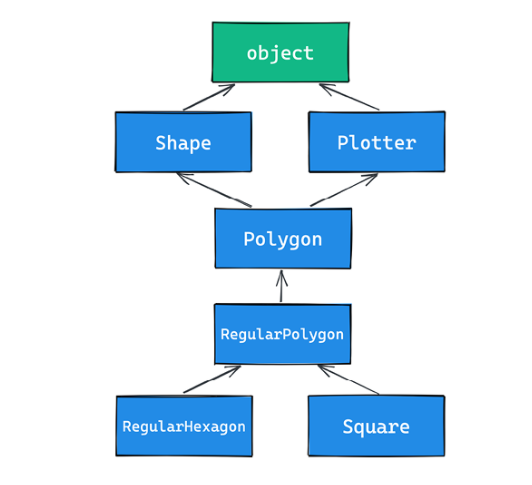

ตามรูปด้านบนแสดงคลาส shape, Plotter เป็นเบสคลาสให้กับทุกคลาสอื่นๆ คลาสPolygonสืบทอดโดยตรงจากทั้งสองคลาส  RegularPolygonสืบทอดจากPolygonที่ซึ่ง RegularHexagon, Square สืบทอดจากRegularPolygon. อย่างที่เคยอธิบาย Shape, Plotter สืบทอดจาก object โดยไม่ได้ประกาศอย่างชัดเจน


In [13]:
# oop/multiple.inheritance.py
class Shape:
    geometric_type = 'Generic Shape'
    def area(self):  # This acts as placeholder for the interface
        raise NotImplementedError
    def get_geometric_type(self):
        return self.geometric_type
class Plotter:
    def plot(self, ratio, topleft):
        # Imagine some nice plotting logic here...
        print('Plotting at {}, ratio {}.'.format(
            topleft, ratio))
class Polygon(Shape, Plotter):  # base class for polygons
    geometric_type = 'Polygon'
class RegularPolygon(Polygon):  # Is-A Polygon
    geometric_type = 'Regular Polygon'
    def __init__(self, side):
        self.side = side
class RegularHexagon(RegularPolygon):  # Is-A RegularPolygon
    geometric_type = 'RegularHexagon'
    def area(self):
        return 1.5 * (3 ** .5 * self.side ** 2)
class Square(RegularPolygon):  # Is-A RegularPolygon
    geometric_type = 'Square'
    def area(self):
        return self.side * self.side
hexagon = RegularHexagon(10)
print(hexagon.area())  # 259.8076211353316
print(hexagon.get_geometric_type())  # RegularHexagon
hexagon.plot(0.8, (75, 77))  # Plotting at (75, 77), ratio 0.8.
square = Square(12)
print(square.area())  # 144
print(square.get_geometric_type())  # Square
square.plot(0.93, (74, 75))  # Plotting at (74, 75), ratio 0.93.


259.8076211353316
RegularHexagon
Plotting at (75, 77), ratio 0.8.
144
Square
Plotting at (74, 75), ratio 0.93.



นี่คือลักษณะการใช้งานMultiple inheritanceทั่วไป    ในคลาสPlotteมีmethodชื่อplot() ซึ่งให้ความสามารถในการพล็อตแก่คลาสใดก็ตามที่สืบทอดจากมัน 
คลาสที่น่าสนใจคลาสแรกคือ Polygon ซึ่งสืบทอดจากทั้งShape และ Plotter.

Polygonก็ยังมีหลายชนิด  เราสนใจชนิดregular ซึ่งเป็นชนิดที่มีมุมเท่ากันและขนาดด้านเท่ากัน ดังน้้นเราจึงสร้างคลาส RegularPolygon ซึ่งสืบทอดจาก Polygon ข้างในเราสร้างmethod __init__() ซึ่งต้องการทราบความยาวของด้าน  เราสร้างRegularHexagon(ห้าเหลี่ยมด้านเท่า)กับSqare(สี่เหลี่ยมจัตุรัส) ทั้งสองสืบทอดจากRegularPolygon.

ภายในคลาสSquare, RegularHexagon มีarea() เราสามารถเรียก get_geometric_type() เพื่อดูชื่อชนิดจากทั้งสองคลาส แม้ว่ามันจะไม่ได้ถูกนิยามในตัวคลาสของทั้งสองคลาส  ไพธอนรู้ที่จะวิ่งย้อนกลับไปตามโซ่ของการสืบทอดจนกระทั้งถึงคลาสShapeที่นิยามmethodนี้

เมทอด Plot ทำให้เราสามารถนิยามการพล็อตของแต่ละคลาสลูกได้ต่างกันออกไป

การจะใช้Multiple inheritance มีประโยชน์มาก เราจะต้องเข้าใจและคาดได้ว่าจะเกิดอะไรขึ้นเวลาที่เราจะใช้



# Method resolution order

โซ่แห่งการสืบทอดที่เราเคยเรียก การหาชื่อในโซ่แห่งการสืบทอดมีชื่อเรียก  มันเรียกว่า Method Resolution Order (MRO) 


In [14]:
# oop/multiple.inheritance.py
print(square.__class__.__mro__)
# prints:
# (<class '__main__.Square'>, <class '__main__.RegularPolygon'>,
# <class '__main__.Polygon'>, <class '__main__.Shape'>,
# <class '__main__.Plotter'>, <class 'object'>)
print(Square.mro())


(<class '__main__.Square'>, <class '__main__.RegularPolygon'>, <class '__main__.Polygon'>, <class '__main__.Shape'>, <class '__main__.Plotter'>, <class 'object'>)
[<class '__main__.Square'>, <class '__main__.RegularPolygon'>, <class '__main__.Polygon'>, <class '__main__.Shape'>, <class '__main__.Plotter'>, <class 'object'>]


เรามีวิธีในการเรียกหา mro. ถ้าเราเรียกจาก Square.__mro__, or Square.mro() เราจะได้คำตอบจากคลาส คือพิมพ์เขียว  แต่ถ้าเราเลือกจะเรียก square.__class__.__mro__ ซึ่ง square เป็น instance เราจะได้คำตอบที่มาจากชีวิตของวัตถุจริงๆในขณะที่กำลังทำงาน (dynamically)

นักเรียนคงจะเห็นปัญหาของการหาชื่อในโซ๋แห่งการสืบทอด  ถ้าชื่อไม่ซ้ำ การหาคงไม่มีปัญหา  ถ้าชื่อซ้ำแต่การหามีโซ่ที่ไม่มีทางแยก การหาก็ไม่ใช่ปัญหาอีก   การหาจะมีปัญหาก็เมื่อชื่อมันซ้ำบนทางแยก  เพื่อจะดูปัญหานี้ ลองทดลองดังข้างล่าง

In [15]:
# oop/mro.simple.py
class A:
    label = 'a'
class B(A):
    label = 'b'
class C(A):
    label = 'c'
class D(B, C):
    pass
d = D()
print(d.label)  # Hypothetically this could be either 'b' or 'c'


b


ทั้ง BและC ล้วนสืบทอดจาก A, และ D สืบทอดจากทั้ง BและC. นั่นคือการหาattributeที่ชื่อ label สามารถไปถึงบนสุดคือAผ่านBหรือC. ทางไหนถึงก่อน จะก่อให้เกิดผลที่ต่างกันออกไป

จากการทดลอง เราได้ผล 'b' เพราะว่าคลาสB อยู่ทางซ้ายสุดของเบสคลาสของD. 
ถ้าเราไม่นิยามlabel ที่คลาสBล่ะ จะเกิดอะไรขึ้น?  MRO จะหาถึงคลาสAก่อนหรือถึงคลาสCก่อน?


In [16]:
# oop/mro.py
class A:
    label = 'a'
class B(A):
    pass  # was: label = 'b'
class C(A):
    label = 'c'
class D(B, C):
    pass
d = D()
print(d.label)  # 'c'
print(d.__class__.mro())  # notice another way to get the MRO
# prints:
# [<class '__main__.D'>, <class '__main__.B'>,
# <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]


c
[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]


คำตอบคือคลาสCก่อน  ซึ่งเมื่อดูMROเราก็จะเข้าใจ  ออร์เดอร์ของการหาคือ D-B-C-A


## Class and static methods
่มันมี method พิเศษอีกสองชนิดต้องอธิบาย

# Class and static methods
ที่มา https://www.programiz.com/python-programming/methods

# Static methods
- ใช้ในการรวมฟังก์ชั่นหลายๆฟังก์ชั่นไว้ในคลาสเฉยๆ  ไม่เกี่ยวกับคลาสใดๆ  มักเป็นพวกutility functions
- เป็น function ของคลาส ที่ไม่อนุญาติให้สืบทอด
- ไม่มีคำว่า self ใน method declaration และ ไม่สามารถเข้าถึง class attribute
- มี Decorator @staticmethod อยู่บน function definition  เราจะเรียนDecorator ครั้งถัดไป
- หรือใช้ฟังก์ชั่น staticmethod() ในการเปลี่ยนให้กลายเป็น static method

In [ ]:
class Mathematics:

    @staticmethod
    def addNumbers(x, y):
        return x + y



print('The sum is:', Mathematics.addNumbers(5, 10))
   


In [ ]:
class Mathematics:

    def addNumbers(x, y):
        return x + y

# create addNumbers static method
Mathematics.addNumbers = staticmethod(Mathematics.addNumbers)

print('The sum is:', Mathematics.addNumbers(5, 10))

In [ ]:
print("จงใจผิด  static method ไม่สามารถเรียก class attribute")
class Mathematics2:
    k=3
    
    @staticmethod
    def addAttribute(x):
        return x + k



print('The sum is:', Mathematics2.addAttribute(10))

# Class methods
- ใช้เป็นฟังก์ชั่น(method)ของคลาส  มักจะเป็นFactory method
- การเรียกคลาสเมทอดจะต้องเรียกด้วยชื่อคลาส คลาสลูกสามารถเรียกใช้คลาสเมทอดของคลาสแม่ได้
- ใช้คำว่า cls ใน method declaration และ สามารถเข้าถึง class attribute
- มี Decorator @classmethod อยู่บน function definition  เราจะเรียนDecorator ครั้งถัดไป
- หรือใช้ฟังก์ชั่น classmethod() ในการเปลี่ยนให้กลายเป็น class method

In [ ]:
class Person:
    age = 25

    def printAge(cls):
        print('The age is:', cls.age)

# create printAge class method
Person.printAge = classmethod(Person.printAge) #แสดงการใช้fn classmethod

Person.printAge()

In [ ]:
from datetime import date

# random Person
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    @classmethod
    def fromBirthYear(cls, name, birthYear):
        return cls(name, date.today().year - birthYear)

    def display(self):
        print(self.name + "'s age is: " + str(self.age))

person = Person('Adam', 19)
person.display()

person1 = Person.fromBirthYear('John',  1985)
person1.display()


การเรียกคลาสเมทอดจะต้องเรียกด้วยชื่อคลาส คลาสลูกสามารถเรียกใช้คลาสเมทอดของคลาสแม่ได้

In [ ]:
from datetime import date

# random Person
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    @staticmethod
    def fromFathersAge(name, fatherAge, fatherPersonAgeDiff):
        return Person(name, date.today().year - fatherAge + fatherPersonAgeDiff)

    @classmethod
    def fromBirthYear(cls, name, birthYear):
        return cls(name, date.today().year - birthYear)

    def display(self):
        print(self.name + "'s age is: " + str(self.age))

class Man(Person):
    sex = 'Male'

man = Man.fromBirthYear('John', 1985)
print(isinstance(man, Man))
print(man.name)

man1 = Man.fromFathersAge('John', 1965, 20)
print(isinstance(man1, Man))
print(type(man1))

ข้างล่างแสดงคลาสเมทอด กับการinheritance และการเข้าถึงclass attribute

In [ ]:
from datetime import date

# random Person
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    @staticmethod
    def fromFathersAge(name, fatherAge, fatherPersonAgeDiff):
        return Person(name, date.today().year - fatherAge + fatherPersonAgeDiff)

    @classmethod
    def fromBirthYear(cls, name, birthYear):
        return cls(name, date.today().year - birthYear)

    def display(self):
        print(self.name + "'s age is: " + str(self.age))

class Man(Person):    
    malePrefix = "Mr. "
    sex = 'Male'
    
    @classmethod
    def fromBirthYear(cls, name, birthYear):
        return cls(cls.malePrefix+ name, date.today().year - birthYear)
    

man = Man.fromBirthYear('John', 1985)
print(isinstance(man, Man))
print(man.name)



## Name mangling
บางครั้งเรามีตัวแปรชื่อเดียวกันในคลาสลูกกับคลาสพ่อแม่  ก่อให้เกิดความสับสนว่าใช้ตัวแปรของคลาสไหนอยู่  ไพธอนมีวิธีแก้ไขโดยการใส่underscoreสองครั้ง มันจะเติมชื่อคลาสให้เอง
ถ้าไม่มีสิ่งนี้อาจจะก่อให้เกิดbugได้ เช่น

In [ ]:
# oop/private.attrs.py
class A:
    def __init__(self, factor):
        self._factor = factor
    def op1(self):
        print('Op1 with factor {}...'.format(self._factor))
class B(A):
    def op2(self, factor):
        self._factor = factor
        print('Op2 with factor {}...'.format(self._factor))
obj = B(100)
obj.op1()    # Op1 with factor 100...
obj.op2(42)  # Op2 with factor 42...
obj.op1()    # Op1 with factor 42... <- This is BAD
print("Op1 with factor 42... <- This is BAD")

In [ ]:
objA = A(11)
print(objA._factor)

The underscore prefix 1 ครั้ง  เป็นการบอกโปรแกรมเมอร์คนอื่นว่าเป็นclass attributeที่ใช้ภายในคลาส

In [ ]:
# oop/private.attrs.py
print(obj.__dict__.keys())
# dict_keys(['_factor'])



In [ ]:
dir(obj)

เราจะเห็นชื่อ '_factor' ใน dir() แค่ชื่อเดียว

In [ ]:
# oop/private.attrs.fixed.py
class A:
    def __init__(self, factor):
        self.__factor = factor
    def op1(self):
        print('Op1 with factor {}...'.format(self.__factor))
class B(A):
    def op2(self, factor):
        self.__factor = factor
        print('Op2 with factor {}...'.format(self.__factor))
obj = B(100)
obj.op1()    # Op1 with factor 100...
obj.op2(42)  # Op2 with factor 42... 
obj.op1()    # Op1 with factor 100... <- Wohoo! Now it's GOOD!
print("This is what expected")

Wow, look at that! Now it's working as desired. Python is kind of magic and in this case, what is happening is that the name-mangling mechanism has kicked in.

Name mangling means that any attribute name that has at least two leading underscores and at most one trailing underscore, such as __my_attr, is replaced with a name that includes an underscore and the class name before the actual name, such as _ClassName__my_attr.

This means that when you inherit from a class, the mangling mechanism gives your private attribute two different names in the base and child classes so that name collision is avoided. Every class and instance object stores references to their attributes in a special attribute called __dict__, so let's inspect obj.__dict__ to see name mangling in action:

This is the _factor attribute that we find in the problematic version of this example, but look at the one that is using __factor:

In [ ]:
# oop/private.attrs.fixed.py
print(obj.__dict__.keys())
# dict_keys(['_A__factor', '_B__factor'])


ตอนนี้ obj มีสองfactor attribute, _A__factor (mangled within the A class), and _B__factor (mangled within the B class). นี่คือกาลไกที่ทำให้  obj.__factor = 42, __factor ใน A ไม่เปลี่ยนเพราะเรากำลังทำงานกับ  _B__factor, และไม่ได้ยุ่งกับ  _A__factor


In [ ]:
dir(obj)

โปรดสังเกตุ _A__factor, _B__factor ใน dir(obj)

# Todays's Lecture
- Class Variable and Instance variable again
- function definition with arrow
- Example of Inheritance with Class method
- Example of Multiple inheritance 
- Decorators
- Property Decorators

# Class Variable and Instance Variable
ตำแหน่งของการประกาศชื่อ Variable มีความสำคัญ  มันบอกว่าเป็นตัวแปรของคลาสหรือตัวแปรของวัตถุ  เวลาเรียกClass Variableจะเรียกชื่อคลาสจุดชื่อตัวแปรคลาส  ทั้งจากในคลาสและจากนอกคลาส

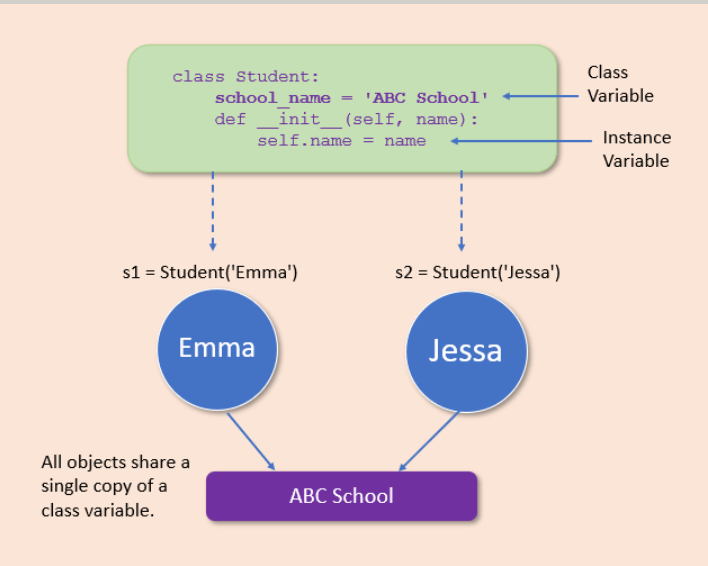

In [ ]:
class Weight:
    xchange_kg_baht = 65.6
    def __init__(self, kg):
        self.kg = kg
        print(id(self.xchange_kg_baht))
        print(id(Weight.xchange_kg_baht))
        
    def to_baht(self):
        self.baht = Weight.xchange_kg_baht*self.kg
        print(id(self.xchange_kg_baht))
        print(id(Weight.xchange_kg_baht))
        return Weight.xchange_kg_baht*self.kg #สังเกตุการเรียกClass Variable จากในคลาส

ข้างล่างแสดงการใช้ตัวแปรคลาสตามปกติ

In [ ]:
myGold = Weight(0.1)
BahtMyGold = myGold.to_baht()
print(myGold.baht)
print(BahtMyGold)
#print('Weight',Weight.xchange_kg_baht)
#print('Weight',id(Weight.xchange_kg_baht))
#print('my',id(myGold.xchange_kg_baht))

แสดงให้เห็นว่าตัวแปรคลาสเป็นobjectเดียวกันสำหรับทุกinstanceของคลาส

In [ ]:
Weight.xchange_kg_baht =1
print('Weight',id(Weight.xchange_kg_baht))
herGold = Weight(3.)
print(herGold.to_baht())
print('my',myGold.to_baht())
print('my',id(myGold.xchange_kg_baht))
print('her',id(herGold.xchange_kg_baht))

การเขียนxchange_kg_baht  แบบด้านล่างไม่ได้เปลี่ยนตัวแปรคลาส แต่เป็นการสร้าง object variableตัวใหม่ขึ้นมา  ที่เรียกว่าAttribute Shadowing

In [ ]:
myGold.xchange_kg_baht = 2
print('my',myGold.to_baht())
print('my',id(myGold.xchange_kg_baht))
print('her',herGold.to_baht())
print('her',id(herGold.xchange_kg_baht))

นิยามตัวแปรเฉพาะobjectตัวนี้ตัวเดียว

In [ ]:
Weight.xchange_kg_baht = 65.6
myDogGold = Weight(10)
myDogGold.purity = 1.1 #1.1 percent gold
print('my',myGold.to_baht())
print('my',id(myGold.xchange_kg_baht))
print('her',herGold.to_baht())
print('her',id(herGold.xchange_kg_baht))
print('myDog',myDogGold.to_baht())
print('myDog',id(myDogGold.xchange_kg_baht))
print(myDogGold.purity)
print(myGold.purity)

การใช้Class Variableมักจะใช้กรณีที่ทั้งคลาสใช้ร่วมกัน  เช่นจำนวนประชากรของคลาสสัตว์ชนิดหนึ่ง   จำนวนตัวเลขของบัตรประชาชนไทย 

# Arrow in Python 3 function definition
อันนี้แค่บอกกับมนุษย์คนอื่นว่ามันreturn typeอะไร  แต่ว่าสำหรับpython interpreter, มันคือdocumentation ไม่ได้ประมวลผลอะไร

In [ ]:
def foo(i) -> float:
    return i*3.0

In [ ]:
foo(2)

In [ ]:
foo('test')

In [ ]:
def foo2(i) -> float:
    return i

In [ ]:
foo2('test')

In [ ]:
def foo3(i) -> str:
    return i

In [ ]:
foo3('test')

In [ ]:
def foo4(i) -> wfwfwf:
    return i

# OOP Case Study

TODO list

- Client must connect to server through TCP/IP
- Once TCP connected, the database connection should follow
- Following parameters 
   - Local side: IP address, Mac Address or Host name (If Host name, must lookup local Host to IP table)
   - Remote side: IP address 
   - Connection param: Status, Protocol Name according to the layer, Protocol Version
   - Buffer memory which provide serialization of protocols
- DB Clinet must be able to do Query, Insert


In [ ]:
class ClientTcpConnect:
    protocolName = 'TCP/IP'
    protocolVersion = 'Version 4'
    def __init__(self, ipAddr):
        self.macAddr = self.getMacAddr()
        self.ipAddr = ipAddr
        self.status = 'idle'
    
    @staticmethod
    def getMacAddr():
        pass
    
    @staticmethod
    def hostNameLookup(hostName):
        pass
        
    @classmethod
    def init_with_hostName(cls, hostName):
        pass
        
        
    def initializeHandShake(self,remoteIpAddr):
        pass
            
    def disconnection(self):
        pass
            
    
class ClientDbConnect(ClientTcpConnect):
    dbProtocol = 'Oracle'
    
    def __init__(self,user,passwd,ip,remoteIp):
        self.user = user
        self.passwd = passwd
        super().__init__(ip)
        
        
    @classmethod
    def init_with_hostName(cls, user,passwd, hostName,remoteIP):
        pass
           
        
    def queryDb(self,sql):
        pass  
    
    
    def insertDb(self, sql):
        pass
    


In [ ]:
import random


class ClientTcpConnect:
    protocolName = 'TCP/IP'
    protocolVersion = 'Version 4'
    def __init__(self, ipAddr):
        self.macAddr = self.getMacAddr()
        self.ipAddr = ipAddr
        self.status = 'idle'
    
    @staticmethod
    def getMacAddr():
        return 'A1212-B3434'
    
    @staticmethod
    def hostNameLookup(hostName):
        if hostName == 'mySelf':
            return '127.0.0.1'
        elif hostName == 'hisHome':
            return '314.10.100.12'
        
    @classmethod
    def init_with_hostName(cls, hostName):
        ip = self.hostNameLookup(hostName)
        return cls(ip)
        
        
    def initializeHandShake(self,remoteIpAddr):
        self.remoteIpAddr = remoteIpAddr
        chance = random.randint(0,9)
        if chance<8:
            print('Connected')
            self.status = 'connected'
        else:
            print('Error Connecting')
            
    def disconnection(self):
        if not self.remoteIpAddr or not self.status=='connected' :
            print('Error: There is no connection yet')
            return -1
        else:
            self.status = 'idle'
            del self.remoteIpAddr
            print('Disconnected')
            
    
class ClientDbConnect(ClientTcpConnect):
    dbProtocol = 'Oracle'
    
    def __init__(self,user,passwd,ip,remoteIp):
        self.user = user
        self.passwd = passwd
        super().__init__(ip)
        super().initializeHandShake(remoteIp)
        
    @classmethod
    def init_with_hostName(cls, user,passwd, hostName,remoteIP):
        ip = super().hostNameLookup(hostName)
        return cls(user,passwd,ip,remoteIP)
           
        
    def queryDb(self,sql):
        if self.status != 'connected':
            return -1        
        if 'SELECT' in sql:
            return 'name addr job_desc position'
        else:
            print('SQL error: missing SELECT')
            return -1       
    
    
    def insertDb(self, sql):
        if self.status != 'connected':
            return -1
        if 'INSERT' in sql:
            return 0
        else:
            print('SQL error: missing INSERT')
            return -1
    

        
        
        

In [ ]:
officeDbCon =  ClientDbConnect.init_with_hostName('admin','1234',hostName='hisHome',remoteIP='182.182.182.182')

In [ ]:
officeDbCon.status
officeDbCon.remoteIpAddr


In [ ]:
officeDbCon2 =  ClientDbConnect('admin2','12345','12.19.12.19','192.192.192.192')

In [ ]:
for i in range(5):
    print(ClientDbConnect.init_with_hostName('admin','1234',hostName='hisHome',remoteIP='182.182.182.182').status)

In [ ]:
print(officeDbCon.queryDb('from myTable;'))# จงใจผิด
print(officeDbCon.queryDb('SELECT * from myTable;'))
print(officeDbCon.insertDb('SELECT * from myTable;'))# จงใจผิด
print(officeDbCon.insertDb('INSERT into myTable blabla;'))
#Polymorphism here
officeDbCon.disconnection()

In [ ]:
print(officeDbCon2.queryDb('from myTable;'))# จงใจผิด
print(officeDbCon2.queryDb('SELECT * from myTable;'))
print(officeDbCon2.insertDb('SELECT * from myTable;'))# จงใจผิด
print(officeDbCon2.insertDb('INSERT into myTable blabla;'))
#Polymorphism here
officeDbCon2.disconnection()

- เราควรใช้ ENUM ในการเรียกชื่อConstantที่นิยามสถานะ
- เราต้องการสร้งคลาส DB connect ให้มี buffer สำหรับส่งข้อมูลผ่าน tcp/ip (serialization) 
   - has_a relationship

In [ ]:
import random
import enum

class ConnectionStatus(enum.Enum):
    CONNECTED = 1
    IDLE = 0

class DbProtocol:
    
    def __init__(self, protocolVersion,myMacAddr, remoteIp, handshakeStr):
        self.protocolVersion = protocolVersion   
        self.buffer = protocolVersion + '|'+ myMacAddr + '|'+ remoteIp + '|'+ handshakeStr 

        

class ClientTcpConnect:
    protocolName = 'TCP/IP'
    protocolVersion = 'Version 4'
    def __init__(self, ipAddr):
        self.macAddr = self.getMacAddr()
        self.ipAddr = ipAddr
        self.status = 'idle'
    
    @staticmethod
    def getMacAddr():
        return 'A1212-B3434'
    
    @staticmethod
    def hostNameLookup(hostName):
        if hostName == 'mySelf':
            return '127.0.0.1'
        elif hostName == 'hisHome':
            return '314.10.100.12'
        
    @classmethod
    def init_with_hostName(cls, hostName):
        ip = self.hostNameLookup(hostName)
        return cls(ip)
        
        
    def initializeHandShake(self,remoteIpAddr)->str:
        self.remoteIpAddr = remoteIpAddr
        chance = random.randint(0,9)
        if chance<8:
            print('Connected')
            self.status = ConnectionStatus.CONNECTED
            return 'AABBAABBA'
        else:
            print('Error Connecting')
            return 'ERRORCODE'
            
    def disconnection(self):
        if not self.remoteIpAddr or not self.status==ConnectionStatus.CONNECTED:
            print('Error: There is no connection yet')
            return -1
        else:
            self.status = ConnectionStatus.IDLE
            del self.remoteIpAddr
            print('Disconnected')
            
    
class ClientDbConnect(ClientTcpConnect):
    protocolVersion = '3.2'
    
    
    def __init__(self,user,passwd,ip,remoteIp):
        self.user = user
        self.passwd = passwd
        super().__init__(ip)
        self.handshakeStr = super().initializeHandShake(remoteIp)
        self.dbProtocol = DbProtocol(ClientDbConnect.protocolVersion, self.macAddr,\
                                                            self.remoteIpAddr,self.handshakeStr)
        
    @classmethod
    def init_with_hostName(cls, user,passwd, hostName,remoteIP):
        ip = super().hostNameLookup(hostName)        
        return cls(user,passwd,ip,remoteIP)
           
        
    def queryDb(self,sql):
        if self.status != ConnectionStatus.CONNECTED:
            return -1        
        if 'SELECT' in sql:
            return 'name addr job_desc position'
        else:
            print('SQL error: missing SELECT')
            return -1       
    
    
    def insertDb(self, sql):
        if self.status != ConnectionStatus.CONNECTED:
            return -1
        if 'INSERT' in sql:
            return 0
        else:
            print('SQL error: missing INSERT')
            return -1
    

        
        
        

In [ ]:
officeDbCon =  ClientDbConnect.init_with_hostName('admin','1234',hostName='hisHome',remoteIP='182.182.182.182')

In [ ]:
print(officeDbCon.dbProtocol.buffer)

In [ ]:
def randomIp():
    ips = (str(random.randint(0,255)),str(random.randint(0,255))\
           ,str(random.randint(0,255)),str(random.randint(0,255)))  
    return '.'.join(ips)

print(randomIp())

In [ ]:
for i in range(5):
    remoteIP = randomIp()
    con = ClientDbConnect.init_with_hostName('admin','1234','hisHome',remoteIP)
    print(con.status)
    print(con.dbProtocol.buffer)

In [ ]:
print(officeDbCon.queryDb('from myTable;'))# จงใจผิด
print(officeDbCon.queryDb('SELECT * from myTable;'))
print(officeDbCon.insertDb('SELECT * from myTable;'))# จงใจผิด
print(officeDbCon.insertDb('INSERT into myTable blabla;'))

officeDbCon.disconnection()  

เราสร้าง connect() ชื่อเดียวกันทั้งในพ่อแม่ class ClientTcpConnect และคลาสลูก class ClientDbConnect  โดยคลาสลูกเรียกconnect()ของคลาสพ่อแม่

In [ ]:
import random
import enum

class ConnectionStatus(enum.Enum):
    CONNECTED = 1
    IDLE = 0

class DbProtocol:
    
    def __init__(self, protocolVersion,myMacAddr, remoteIp, handshakeStr):
        self.protocolVersion = protocolVersion   
        self.buffer = protocolVersion + '|'+ myMacAddr + '|'+ remoteIp + '|'+ handshakeStr 

        

class ClientTcpConnect:
    protocolName = 'TCP/IP'
    protocolVersion = 'Version 4'
    def __init__(self, ipAddr,remoteIpAddr):
        self.macAddr = self.getMacAddr()
        self.ipAddr = ipAddr
        self.status = 'idle'
        self.remoteIpAddr = remoteIpAddr
    
    @staticmethod
    def getMacAddr():
        return 'A1212-B3434'
    
    @staticmethod
    def hostNameLookup(hostName):
        if hostName == 'mySelf':
            return '127.0.0.1'
        elif hostName == 'hisHome':
            return '314.10.100.12'
        
    @classmethod
    def init_with_hostName(cls, hostName):
        ip = self.hostNameLookup(hostName)
        return cls(ip)
        
        
    def connect(self)->str:
        
        chance = random.randint(0,9)
        if chance<8:
            print('Connected')
            self.status = ConnectionStatus.CONNECTED
            return 'AABBAABBA'
        else:
            print('Error Connecting')
            return 'ERRORCODE'
            
    def disconnection(self):
        if not self.remoteIpAddr or not self.status==ConnectionStatus.CONNECTED:
            print('Error: There is no connection yet')
            return -1
        else:
            self.status = ConnectionStatus.IDLE
            del self.remoteIpAddr
            print('Disconnected')
            
    
class ClientDbConnect(ClientTcpConnect):
    protocolVersion = '3.2'
    
    
    def __init__(self,user,passwd,ip,remoteIp):
        self.user = user
        self.passwd = passwd
        super().__init__(ip,remoteIp)
        
        
    def connect(self)->int:
        self.handshakeStr = super().connect()
        if self.handshakeStr == 'ERRORCODE': 
            return -1
        self.dbProtocol = DbProtocol(ClientDbConnect.protocolVersion, self.macAddr,\
                                                            self.remoteIpAddr,self.handshakeStr)
        return 0
        
    @classmethod
    def init_with_hostName(cls, user,passwd, hostName,remoteIP):
        ip = super().hostNameLookup(hostName)        
        return cls(user,passwd,ip,remoteIP)
           
        
    def queryDb(self,sql):
        if self.status != ConnectionStatus.CONNECTED:
            return -1        
        if 'SELECT' in sql:
            return 'name addr job_desc position'
        else:
            print('SQL error: missing SELECT')
            return -1       
    
    
    def insertDb(self, sql):
        if self.status != ConnectionStatus.CONNECTED:
            return -1
        if 'INSERT' in sql:
            return 0
        else:
            print('SQL error: missing INSERT')
            return -1
    

        
        
        

In [ ]:
officeDbCon =  ClientDbConnect.init_with_hostName('admin','1234',hostName='hisHome',remoteIP='182.182.182.182')
officeDbCon.connect()


In [ ]:
print(officeDbCon.dbProtocol.buffer)

In [ ]:
import sys
for i in range(20):
    remoteIP = randomIp()
    con = ClientDbConnect.init_with_hostName('admin','1234','hisHome',remoteIP)
    con.connect()
    try:
        print(con.status)
        print(con.dbProtocol.buffer)
    except Exception as e:
        print("error occured: "+str(e))
    
    

In [ ]:
print(officeDbCon.queryDb('from myTable;'))# จงใจผิด
print(officeDbCon.queryDb('SELECT * from myTable;'))
print(officeDbCon.insertDb('SELECT * from myTable;'))# จงใจผิด
print(officeDbCon.insertDb('INSERT into myTable blabla;'))

    

# Multple inheritance

In [ ]:
import random
import enum

class ConnectionStatus(enum.Enum):
    CONNECTED = 1
    IDLE = 0

class DbProtocol:
    
    def __init__(self, protocolVersion,myMacAddr, remoteIp, handshakeStr):
        self.protocolVersion = protocolVersion   
        self.buffer = protocolVersion + '|'+ myMacAddr + '|'+ remoteIp + '|'+ handshakeStr 

        

class ClientTcpConnect:
    protocolName = 'TCP/IP'
    protocolVersion = 'Version 4'
    def __init__(self, ipAddr,remoteIpAddr):
        self.macAddr = self.getMacAddr()
        self.ipAddr = ipAddr
        self.status = 'idle'
        self.remoteIpAddr = remoteIpAddr
    
    @staticmethod
    def getMacAddr():
        return 'A1212-B3434'
    
    @staticmethod
    def hostNameLookup(hostName):
        if hostName == 'mySelf':
            return '127.0.0.1'
        elif hostName == 'hisHome':
            return '314.10.100.12'
        
    @classmethod
    def init_with_hostName(cls, hostName):
        ip = self.hostNameLookup(hostName)
        return cls(ip)
        
        
    def connect(self)->str:
        
        chance = random.randint(0,9)
        if chance<8:
            print('Connected')
            self.status = ConnectionStatus.CONNECTED
            return 'AABBAABBA'
        else:
            print('Error Connecting')
            return 'ERRORCODE'
            
    def disconnection(self):
        if not self.remoteIpAddr or not self.status==ConnectionStatus.CONNECTED:
            print('Error: There is no connection yet')
            return -1
        else:
            self.status = ConnectionStatus.IDLE
            del self.remoteIpAddr
            print('Disconnected')

class SQLDatabase:
    def queryDb(self,sql):
        if self.status != ConnectionStatus.CONNECTED:
            return -1        
        if 'SELECT' in sql:
            return 'name addr job_desc position'
        else:
            print('SQL error: missing SELECT')
            return -1       
    
    
    def insertDb(self, sql):
        if self.status != ConnectionStatus.CONNECTED:
            return -1
        if 'INSERT' in sql:
            return 0
        else:
            print('SQL error: missing INSERT')
            return -1
    
    
    
class ClientDb(ClientTcpConnect,SQLDatabase):
    protocolVersion = '3.2'
    
    
    def __init__(self,user,passwd,ip,remoteIp):
        self.user = user
        self.passwd = passwd
        super().__init__(ip,remoteIp)
        
        
    def connect(self)->int:
        self.handshakeStr = super().connect()
        if self.handshakeStr == 'ERRORCODE': 
            return -1
        self.dbProtocol = DbProtocol(ClientDb.protocolVersion, self.macAddr,\
                                                            self.remoteIpAddr,self.handshakeStr)
        return 0
        
    @classmethod
    def init_with_hostName(cls, user,passwd, hostName,remoteIP):
        ip = super().hostNameLookup(hostName)        
        return cls(user,passwd,ip,remoteIP)
           
        


        
        
        

In [ ]:
officeDbCon =  ClientDb.init_with_hostName('admin','1234',hostName='hisHome',remoteIP='182.182.182.182')
officeDbCon.connect()

In [ ]:
print(officeDbCon.dbProtocol.buffer)

In [ ]:
import sys

cons = []
for i in range(5):
    remoteIP = randomIp()
    con = ClientDb.init_with_hostName('admin','1234','hisHome',remoteIP)
    con.connect()
    try:
        print(con.status)
        print(con.dbProtocol.buffer)         
    except Exception as e:
        print("error occured: "+str(e))
    else:
        cons.append(con)
        
        
print(cons)
print(len(cons))
for i in cons:
    print(i.remoteIpAddr, i.status)

In [ ]:
print(officeDbCon.queryDb('from myTable;'))# จงใจผิด
print(officeDbCon.queryDb('SELECT * from myTable;'))
print(officeDbCon.insertDb('SELECT * from myTable;'))# จงใจผิด
print(officeDbCon.insertDb('INSERT into myTable blabla;'))

officeDbCon.disconnection()     

# Try to create your own class
Present your own implementation of Multiple inheritance during Lab time with @classmethod and @staticmethod
- Use your base class's method, variable
- Use class variable
- Use cls, self

# Decorator
ที่มา https://www.programiz.com/python-programming/decorator

Python has an interesting feature called decorators to add functionality to an existing code.

This is also called metaprogramming because a part of the program tries to modify another part of the program at compile time

คิดถึงมันว่าเป็นฟังก์ชันที่เรียกอีกฟังก์ชันเพื่อทำตัวเป็น Generic
ไอเดียของคำว่า Generic คือสำหรับทั่วไป  ไม่ใช่สำหรับเฉพาะเจาะจง

In [ ]:
def first(msg):
    print(msg)


first("Hello")

second = first
second("Hello2")
print(type(first),type(second))
print(id(first),id(second))

ทั้งสองชื่อ first, second ชี้ไปที่object ตัวเดียวกัน   ซึ่งบางครั้งไม่ใช่สิ่งที่เราต้องการ

ฟังก์ชั่นสามารถถูกผ่่านในฐานะargumentsของอีกฟังก์ชัน
เช่นที่เราเคยใช้ map, reduce, filter
ฟังก์ชันที่ใช้ฟังก์ชันอื่นเรียกว่า higher order function ยกตัวอย่าง


In [ ]:
def inc(x):
    return x + 1


def dec(x):
    return x - 1


def operate(func, x):
    result = func(x)
    return result

In [ ]:
operate(inc,3)

In [ ]:
operate(dec,3)

In [ ]:
def is_called():
    def is_returned():
        print("Hello")
    return is_returned


new = is_called()

# Outputs "Hello"
new()
type(new)
print(new.__class__.__name__)


ฟังก์ชันด้านบน return function is_returned กลับมา

In [ ]:
def make_pretty(func):
    def inner():
        print("I got decorated")
        func()
    return inner


def ordinary():
    print("I am ordinary")

In [ ]:
ordinary()

In [ ]:
pretty = make_pretty(ordinary)
pretty()

ตัวอย่างด้านบน, make_pretty() คือ decorator (ผู้ตกแต่ง). โดยการเขียนassignment:
``` Python
pretty = make_pretty(ordinary)
```
function ordinary() ถูกตกแต่ง (decorated) แล้วก็คืนค่าเป็น function ที่ชื่อว่า pretty.

เราจะเห็นได้ว่าฟังก์ชันผู้ตกแต่ง(decorator fn) เพิ่มฟังก์ชัน(หมายถึงความสามารถ)ให้กับฟังก์ชันตั้งต้น  มันทำให้ deoorator เหมือนกับการห่อของขวัญโดยที่ decorator ก็คือห่อ  ลักษณะของของขวัญที่ถูกห่อ(ฟังก์ชันดั้งเดิม)ไม่ได้เปลี่ยนไป  แต่มันสวยขึ้น

โดยทั่วไปเราจะใช้ชื่อเดิมหลังการห่อ
``` Python
ordinary = make_pretty(ordinary).
```
ถ้าเราเลือกจะทำแบบนี้ Python มี Syntax ที่จะทำสิ่งนี้โดยเฉพาะนั่นคือเครื่องหมาย @ 





In [ ]:
ordinary = make_pretty(ordinary)
ordinary()

In [ ]:
ordinary()

In [ ]:
@make_pretty
def ordinary():
    print("I am ordinary")

In [ ]:
ordinary()

is equivalent to 

In [ ]:
def ordinary():
    print("I am ordinary")
ordinary = make_pretty(ordinary)

In [ ]:
ordinary()

# Decorating Functions with Parameters

In [ ]:
def divide(a, b):
    return a/b

In [ ]:
divide(2,5)

In [ ]:
divide(2,0) #จงใจผิด division by zero

In [ ]:
def smart_divide(func):
    def inner(a, b):
        print("I am going to divide", a, "and", b)
        if b == 0:
            print("Whoops! cannot divide")
            return

        return func(a, b)# Try to comment out this line
    return inner


@smart_divide
def divide(a, b):
    print(a/b)

In [ ]:
divide(2,5)

In [ ]:
divide(2,0)

In [ ]:
def divide2(a,b):
    return a/b

print(divide2.__name__)
divide2 = smart_divide(divide2)
print(type(divide2))
print(divide2.__name__)

In [ ]:
print(divide2(2,5))
print(divide2(2,0))

จากตัวอย่างด้านบน  มีจุดสังเกตุสองอย่าง  อย่างที่หนึ่งคือ inner function ควรreturn original function  
อย่างที่สองคือ จำนวน arguments ของinner function ควรจะต้องมีเท่ากับ original function. ถ้าเราไม่รู้ว่าจำนวน original function จะเป็นเท่าไหร่  หรือเรารู้แน่ๆว่า original function หลายแบบจะถูกใช้ซึ่งมีปริมาณ arguments ไม่เ่ท่ากันจะทำอย่างไร

เราใช้ฟังก์ชัน function(\*args, \*\*kwargs).  \*args หมายถึง all positional arguments, \*\*kwargs หมายถึง all keyword arguemnts

In [ ]:
def works_for_all(func):
    def inner(*args, **kwargs):
        print("I can decorate any function")
        return func(*args, **kwargs)
    return inner

In [ ]:
def star(func):
    def inner(*args, **kwargs):
        print("*" * 10)
        func(*args, **kwargs)
        print("*" * 10)
    return inner


def percent(func):
    def inner(*args, **kwargs):
        print("%" * 30)
        func(*args, **kwargs)
        print("%" * 30)
    return inner


@star
@percent
def printer(msg):
    print(msg)


printer("AAAAA")

In [ ]:
@star
@percent
def printer(msg):
    print(msg)

is equivalent to

In [ ]:
def printer(msg):
    print(msg)
printer = star(percent(printer))

In [ ]:
printer("CAAAA")

If reverse order

In [ ]:
@percent
@star
def printer(msg):
    print(msg)
    
printer("Hello")

In [ ]:
# decorators/time.measure.deco1.py
from time import sleep, time
def f(sleep_time=0.1):
    sleep(sleep_time)
def measure(func):
    def wrapper(*args, **kwargs):
        t = time()
        func(*args, **kwargs)
        took = time() - t
        print(func.__name__, 'took:', took)
        return took
    return wrapper


f = measure(f)  # decoration point


f(0.2)  # f took: 0.20372915267944336
f(sleep_time=0.3)  # f took: 0.30455899238586426
print(f.__name__)  # wrapper <- ouch!


In [ ]:
# decorators/time.measure.deco1.py
from time import sleep, time

def measure(func):
    def wrapper(*args, **kwargs):
        t = time()
        func(*args, **kwargs)
        took = time() - t
        print(func.__name__, 'took:', took)
        return took
    return wrapper

@measure
def f(a,b,c,sleep_time=0.1): #Add number of params
    sleep(sleep_time)


k=f(9,99,999,0.2)  # f took: 0.20372915267944336
print('k',k)
f(9,99,999,sleep_time=0.3)  # f took: 0.30455899238586426
print(f.__name__)  # wrapper <- ouch!

เราไม่ต้องการเสียชื่อเดิมและdocstringของฟังก์ชันไป  เราสามารถใช้decoratorของfunctools moduleที่ชื่อ@wraps    

In [ ]:
# decorators/time.measure.deco2.py
from time import sleep, time
from functools import wraps
def measure(func):
    @wraps(func)
    def srapper(*args, **kwargs):
        t = time()
        func(*args, **kwargs)
        took = time() - t
        print(func.__name__, 'took:', took)
        return took
        
    return srapper
@measure
def f(sleep_time=0.1):
    """I'm a cat. I love to sleep! """
    sleep(sleep_time)
kk=f(sleep_time=0.3)  # f took: 0.3010902404785156
print(f.__name__, ':', f.__doc__)  # f : I'm a cat. I love to sleep!
print(kk)


# The property decorator
# Class Without Getters and Setters
Let us assume that we decide to make a class that stores the temperature in degrees Celsius. It would also implement a method to convert the temperature into degrees Fahrenheit. One way of doing this is as follows

In [ ]:
class Celsius:
    def __init__(self, temperature = 0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32


In [ ]:
# Basic method of setting and getting attributes in Python
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32


# Create a new object
human = Celsius()

# Set the temperature
human.temperature = 37

# Get the temperature attribute
print(human.temperature)

# Get the to_fahrenheit method
print(human.to_fahrenheit())

In [ ]:
human.__dict__

# Using Getters and Setters
สมมุติว่าเราต้องการจะใช้class Celsius. อุณหภูมิไม่สามารถมีค่าต่ำกว่า -273.15 degrees Celsius ได้

เราจะใส่เงื่อนไขนี้ลงไปในโค้ด

วิธีตรงๆก็คือ

In [ ]:
# Making Getters and Setter methods
class Celsius:
    def __init__(self, temperature=0):
        self.set_temperature(temperature)

    def to_fahrenheit(self):
        return (self.get_temperature() * 1.8) + 32

    # getter method
    def get_temperature(self):
        return self._temperature

    # setter method
    def set_temperature(self, value):
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible.")
        self._temperature = value

In [ ]:
# Making Getters and Setter methods
class Celsius:
    def __init__(self, temperature=0):
        self.set_temperature(temperature)

    def to_fahrenheit(self):
        return (self.get_temperature() * 1.8) + 32

    # getter method
    def get_temperature(self):
        return self._temperature

    # setter method
    def set_temperature(self, value):
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible.")
        self._temperature = value


# Create a new object, set_temperature() internally called by __init__
human = Celsius(37)

# Get the temperature attribute via a getter
print(human.get_temperature())#37

# Get the to_fahrenheit method, get_temperature() called by the method itself
print(human.to_fahrenheit())#98.6

# new constraint implementation
human.set_temperature(-300)#จงใจError

# Get the to_fahreheit method
print(human.to_fahrenheit())

เราทำสำเร็จตามต้องการ  เราไม่สามารถตั้งค่าอุณหภูมิต่ำกว่า -273.15 degrees Celsius.

 ตอนนี้เรามี  obj.get_temperature() แต่เดิมเรามีแค่ obj.temperature นั่่นหมายความว่าโค้ดต่างๆที่เรียกใช้คลาสนี้ต้องเปลี่ยนโค้ดตามทั้งหมด. กรณีเดียวกันก็ต้องกล่าวสำหรับ obj.set_temperature()
 
แล้วถ้าโค้ดที่เรียกคลาสนี้มี100,000บรรทัดหรือมากกว่าล่ะ?

วิธีแก้คือใช้Decorator: @property 



The property Class
วิธีทำ ดูบรรทัดสุดท้ายของโค้ดด้านล่าง

In [ ]:
# using property class
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32

    # getter
    def get_temperature(self):
        print("Getting value...")
        return self._temperature

    # setter
    def set_temperature(self, value):
        print("Setting value...")
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible")
        self._temperature = value

    # creating a property object ในคลาส
    temperature = property(get_temperature, set_temperature)

เราใส่print() เพื่อตรวจสอบการเข้าถึงฟังก์ชั่น get_temperature() and set_temperature() เพื่อเห็นชัดๆว่าฟังก์ชันเหล่านี้ถูกเรียก
บรรทัดสุดท้ายคือการสร้างobject propertyชื่อ temperature. คิดราวกับแปะpropertyของฟังก์ชัน get_temperature and set_temperature ลง member attribute ที่ชือ temperature

In [ ]:
# using property class
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32

    # getter
    def get_temperature(self):
        print("Getting value...")
        return self._temperature

    # setter
    def set_temperature(self, value):
        print("Setting value...")
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible")
        self._temperature = value

    # creating a property object
    temperature = property(get_temperature, set_temperature)


human = Celsius(37)

print(human.temperature)

print(human.to_fahrenheit())

human.temperature = -300

As we can see, any code that retrieves the value of temperature will automatically call get_temperature() instead of a dictionary (__dict__) look-up. Similarly, any code that assigns a value to temperature will automatically call set_temperature().

We can even see above that set_temperature() was called even when we created an object.



In [ ]:
human = Celsius(37)

In [ ]:
# using property class
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32

    # getter
    def get_temperature(self):
        print("Getting value...")
        return self._tttemperature

    # setter
    def set_temperature(self, value):
        print("Setting value...")
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible")
        self._tttemperature = value

    # creating a property object
    temperature = property(get_temperature, set_temperature)


human = Celsius(37)

print(human.temperature)

print(human.to_fahrenheit())

human.temperature = -300

คือเรามี self._tttemperature  ไว้เก็บข้อมูลจริงๆ  ซึ่งข้อมูลนี้จะถูกเรียกผ่าน get_temperature(),set_temperature() ซึ่งสองฟังก์ชันนี้ถูกเรียกผ่านproperty object temperature

In [ ]:
human.temperature

In [ ]:
human.temperature = 37

In [ ]:
human.to_fahrenheit()

By using property, we can see that no modification is required in the implementation of the value constraint. Thus, our implementation is backward compatible.
โดยการใช้ Property เราเห็นได้ว่าไม่มีความจำเป็นต้องแก้ไขโค้ดที่เรียกคลาสนี้  ดังนั้นจึงกล่าวว่าการแก้โค้ดClass Celsius ของเรามัน Backward Compatible (ใช้ได้ย้อนหลัง)

The @property Decorator
In Python, property() is a built-in function that creates and returns a property object. The syntax of this function is:


In [ ]:
property(fget=None, fset=None, fdel=None, doc=None)

where,

- fget is function to get value of the attribute
- fset is function to set value of the attribute
- fdel is function to delete the attribute
- doc is a string (like a comment)

As seen from the implementation, these function arguments are optional. So, a property object can simply be created as follows.

``` Python
temperature = property(get_temperature,set_temperature)
```

In [ ]:
# make empty property
temperature = property()

# assign fget
```Python
temperature = temperature.getter(get_temperature)
```

# assign fset
``` Python
temperature = temperature.setter(set_temperature)
```

แต่การเรียกด้านบนมันคือการเรียก decorator

เรานิยามโดยใช้ @property ดังนี้

In [ ]:
# Using @property decorator
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32

    @property
    def temperature(self):
        print("Getting value...")
        return self._tttemperature

    @temperature.setter
    def temperature(self, value):
        print("Setting value...")
        if value < -273.15:
            raise ValueError("Temperature below -273 is not possible")
        self._tttemperature = value


# create an object
human = Celsius(37)

print(human.temperature)

print(human.to_fahrenheit())

coldest_thing = Celsius(-300)

# Example Polymorphism and Composition

In [ ]:

        
class Item:
    def __init__(self,hitPower):
        self.hitPower =hitPower
    
class GamePeice:
   
    def fight(self):
        print("fight with {} Hit Power is {} ".format(self.item.__class__.__name__,self.item.hitPower))

class Sword(Item):
    def __init__(self,hitPower,length):
        super().__init__(hitPower)
        self.length = length
        
class Fist(Item):
    pass
   
    
class Human(GamePeice):
    
    def __init__(self,height):
        self.height = height
        self.item = Fist(3.0)



class Swordman(Human):
    
    def __init__(self,height,swardHitPower,length):        
        super().__init__(height)
        self.item = Sword(swardHitPower,length)
        
        
aMan = Human(180)
aMan.fight()

aSwordMan = Swordman(170,213,1.0)
aSwordMan.fight()